In [76]:
import pandas as pd
import sketch as sk
import numpy as np
import networkx as nx

In [61]:
data = pd.read_json("dataset.json")
data

,stations,full_timetable
0,"{'Златоуст (1)': ['0', '38', '38', '25', '29',...","{'853': {'route': ['1', '3', '2'], 'free_carri..."
1,"{'Златоуст (1)': ['0', '28', '24', '28', '8', ...","{'896': {'route': ['1', '3', '2'], 'free_carri..."
2,"{'Златоуст (1)': ['0', '25', '15', '6', '15', ...","{'309': {'route': ['1', '3', '2'], 'free_carri..."
3,"{'Златоуст (1)': ['0', '32', '30', '13', '4', ...","{'800': {'route': ['2', '3', '6', '5'], 'free_..."
4,"{'Златоуст (1)': ['0', '10', '38', '16', '1', ...","{'893': {'route': ['1', '3', '6', '5', '7'], '..."
...,...,...
99995,"{'Златоуст (1)': ['0', '39', '6', '25', '32', ...","{'107': {'route': ['1', '3', '2'], 'free_carri..."
99996,"{'Златоуст (1)': ['0', '27', '26', '34', '35',...","{'268': {'route': ['1', '3', '6', '5', '4'], '..."
99997,"{'Златоуст (1)': ['0', '10', '18', '34', '26',...","{'836': {'route': ['1', '3', '6', '5'], 'free_..."
99998,"{'Златоуст (1)': ['0', '36', '14', '32', '33',...","{'341': {'route': ['1', '3', '6', '5'], 'free_..."


In [62]:
data_to_see = data.iloc[0]
data_to_see

stations          {'Златоуст (1)': ['0', '38', '38', '25', '29',...
full_timetable    {'853': {'route': ['1', '3', '2'], 'free_carri...
Name: 0, dtype: object

In [16]:
graph = nx.Graph()

In [51]:
routes = [list(data_to_see['full_timetable'].values())[i]['route'] for i in range(len(data_to_see['full_timetable'].keys()))]
edges_from_routes = [list(zip(route,route[1:])) for route in routes]
edges_from_routes = [edge for route in edges_from_routes for edge in route]

In [52]:
graph.add_edges_from(edges_from_routes)
graph.remove_nodes_from([('1', '3'), ('3', '2')])

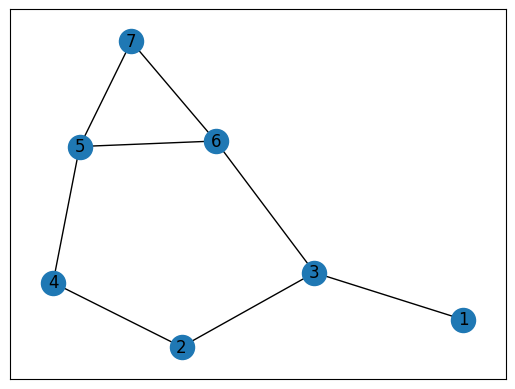

In [60]:
nx.draw_networkx(graph, label=True)

## Matrices

In [82]:
Needs = np.array([list(data_to_see['stations'].values())], dtype=np.int32)
Needs

array([[[ 0, 38, 38, 25, 29,  7, 10],
        [26,  0,  7, 34, 20, 27, 35],
        [15,  5,  0, 27, 16, 31, 24],
        [12, 39,  1,  0,  2, 14, 20],
        [38, 38,  1, 28,  0, 33, 14],
        [21, 27, 24,  9,  1,  0,  3],
        [ 9,  3, 23, 25, 32, 37,  0]]], dtype=int32)

In [85]:
pd.DataFrame(data_to_see['full_timetable'])

,853,801,563,182,643,743,399,930,658,332,...,222,156,719,300,973,883,251,700,324,331
route,"[1, 3, 2]","[1, 3, 2]","[1, 3, 6, 5, 4]","[1, 3, 6, 5, 7]","[1, 3, 6, 5, 7]","[2, 3, 1]","[2, 3, 6, 5]","[2, 3, 6, 5, 7]","[2, 3, 6, 5, 7]","[2, 3, 6, 7]",...,"[5, 7]","[5, 7]","[7, 5]","[7, 5, 4]","[7, 5, 4]","[7, 5, 6, 3, 1]","[7, 5, 6, 3, 2]","[7, 6, 3, 1]","[7, 6, 5]","[7, 6, 5, 4]"
free_carriage,"[21, 21]","[34, 10]","[33, 20, 35, 3]","[15, 18, 13, 36]","[18, 1, 13, 21]","[8, 33]","[12, 37, 16]","[22, 22, 24, 11]","[26, 13, 24, 37]","[32, 9, 31]",...,[25],[36],[21],"[1, 28]","[24, 36]","[5, 25, 11, 4]","[11, 3, 10, 26]","[16, 29, 22]","[1, 30]","[39, 28, 5]"
timetable,"[02:00 - 02:38, 04:48 - 06:11, 13:35 - 13:58]","[03:24 - 04:22, 06:32 - 07:06, 14:30 - 15:39]","[03:43 - 04:26, 06:36 - 08:04, 11:42 - 11:59, ...","[02:44 - 03:14, 05:24 - 05:56, 09:34 - 11:00, ...","[03:23 - 03:48, 05:58 - 07:21, 10:59 - 11:20, ...","[01:00 - 02:01, 09:25 - 10:35, 12:45 - 13:00]","[02:00 - 02:33, 09:57 - 11:01, 14:39 - 15:16, ...","[01:48 - 02:10, 09:34 - 10:16, 13:54 - 14:54, ...","[01:31 - 03:01, 10:25 - 11:53, 15:31 - 16:30, ...","[02:51 - 03:28, 10:52 - 12:14, 15:52 - 17:22, ...",...,"[02:30 - 03:48, 06:26 - 07:24]","[03:59 - 04:24, 07:02 - 08:32]","[01:00 - 01:35, 04:13 - 04:34]","[02:15 - 03:14, 05:52 - 07:15, 09:25 - 09:44]","[02:22 - 03:44, 06:22 - 06:57, 09:07 - 09:48]","[02:26 - 03:15, 05:53 - 06:29, 07:51 - 08:47, ...","[01:36 - 02:46, 05:24 - 05:53, 07:15 - 07:37, ...","[02:38 - 03:23, 04:29 - 04:58, 08:36 - 09:31, ...","[02:36 - 03:35, 04:41 - 05:11, 06:33 - 07:41]","[02:12 - 02:59, 04:05 - 04:38, 06:00 - 07:13, ..."


In [130]:
routes = [list(data_to_see['full_timetable'].values())[i]['route'] for i in range(len(data_to_see['full_timetable'].keys()))]
free_carriages = [list(data_to_see['full_timetable'].values())[i]['free_carriage'] for i in range(len(data_to_see['full_timetable'].keys()))]
cities = list(map(lambda x: int(x[-2:-1]), data_to_see['stations'].keys()))

In [126]:
full_timetable = data_to_see['full_timetable']

In [139]:
from itertools import permutations
paths = list(permutations(cities, 2))
trains = list(full_timetable.keys())
Capacity = np.zeros((len(cols), len(trains)))
for i, train in enumerate(trains[:10]):
    route = tuple(map(lambda x: int(x), full_timetable[train]['route']))
    free_carriage = list(map(lambda x: int(x), full_timetable[train]['free_carriage']))
    for j, path in enumerate(paths):
        #path is in route
        #that is, each element of path is in route
        #AND index of path[0] < index of path[1] in route
        if path[0] in route and path[1] in route:
            ind_of_0 = route.index(path[0])
            ind_of_1 = route.index(path[1])
            if ind_of_0 < ind_of_1:
                #print(f"path is = {path}\t path is = {route}")
                #print(f"free_carriage is {free_carriage}")
                value = min(free_carriage[ind_of_0 : ind_of_1])
                #print(f"value is {value}")

path is = (1, 2)	 path is = (1, 3, 2)
free_carriage is [21, 21]
value is 21
path is = (1, 3)	 path is = (1, 3, 2)
free_carriage is [21, 21]
value is 21
path is = (3, 2)	 path is = (1, 3, 2)
free_carriage is [21, 21]
value is 21
path is = (1, 2)	 path is = (1, 3, 2)
free_carriage is [34, 10]
value is 10
path is = (1, 3)	 path is = (1, 3, 2)
free_carriage is [34, 10]
value is 34
path is = (3, 2)	 path is = (1, 3, 2)
free_carriage is [34, 10]
value is 10
path is = (1, 3)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 33
path is = (1, 4)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 3
path is = (1, 5)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 20
path is = (1, 6)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 20
path is = (3, 4)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 3
path is = (3, 5)	 path is = (1, 3, 6, 5, 4)
free_carriage is [33, 20, 35, 3]
value is 20
path is = (3